## Credit Card Data analysis

Segmentation in marketing is a technique used to divide customers or other entities into groups based on attributes such as behaviour or demographics.

The top challenge faced by marketers is understanding who they are selling to. Once you know your buyer personas, you can tailor your targeting and offerings to increase their satisfaction and your revenue as a result. When you already have a pool of customers and plenty of data, it can be incredibly useful to segment them.

Here we will be using Credit card data to segment the customers.

## About the dataset
The credit card data has 18 attributes for each customer, which include the balance (credit owed by the customer), cash advance (when a customer withdraws cash using the credit card), the customer’s credit limit, minimum payment, percentage of full payments and tenure. A complete data dictionary info is given below:




|Feature|Description|
|-----|-----|
|CUST_ID| Identification of Credit Card holder (Categorical)| 
|BALANCE | Balance amount left in their account to make purchases| 
|BALANCE_FREQUENCY | How frequently the Balance is updated, score between 0 and 1(1 = frequently updated, 0 = not frequently updated |
|PURCHASES | Amount of purchases made from account| 
|ONEOFF_PURCHASES | Maximum purchase amount done in one-go| 
|INSTALLMENTS_PURCHASES | Amount of purchase done in installment| 
|CASH_ADVANCE | Cash in advance given by the user |
|PURCHASES_FREQUENCY | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
|ONEOFFPURCHASESFREQUENCY | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) |
|PURCHASESINSTALLMENTSFREQUENCY | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) |
|CASHADVANCEFREQUENCY | How frequently the cash in advance being paid |
|CASHADVANCETRX | Number of Transactions made with "Cash in Advanced" |
|PURCHASES_TRX | Numbe of purchase transactions made |
|CREDIT_LIMIT | Limit of Credit Card for user| 
|PAYMENTS | Amount of Payment done by user |
|MINIMUM_PAYMENTS | Minimum amount of payments made by user| 
|PRCFULLPAYMENT | Percent of full payment paid by user |
|TENURE | Tenure of credit card service for user|

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
df = pd.read_csv("../data/customer_seg.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Lets check the descriptive Statistics of the data.

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Dealing with missing values
Lets check the number of missing values in the given dataset

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df[df['MINIMUM_PAYMENTS'].isnull()][['BALANCE', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','TENURE','PURCHASES']]

,BALANCE,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASES
3,1666.670542,NaN,0.0,12,1499.00
45,2242.311686,NaN,0.0,12,437.00
47,3910.111237,NaN,0.0,12,0.00
54,6.660517,NaN,0.0,12,310.00
55,1311.995984,NaN,0.0,12,1283.90
...,...,...,...,...,...
8919,14.524779,NaN,0.0,6,152.00
8929,371.527312,NaN,0.0,6,0.00
8935,183.817004,NaN,0.0,6,465.90
8944,193.571722,NaN,0.0,6,1012.73


In [7]:
df[['BALANCE', 'MINIMUM_PAYMENTS']].describe()

,BALANCE,MINIMUM_PAYMENTS
count,8950.000000,8637.000000
mean,1564.474828,864.206542
std,2081.531879,2372.446607
min,0.000000,0.019163
25%,128.281915,169.123707
50%,873.385231,312.343947
75%,2054.140036,825.485459
max,19043.138560,76406.207520


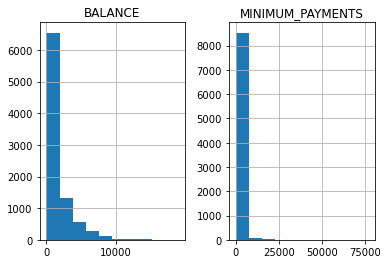

In [8]:
df[['BALANCE', 'MINIMUM_PAYMENTS']].hist()
plt.show()

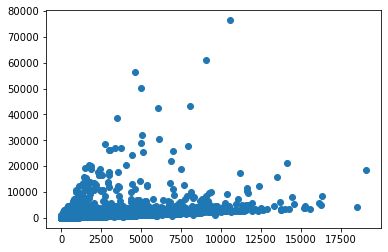

In [9]:
plt.scatter(df['BALANCE'], df['MINIMUM_PAYMENTS'])
plt.show()

In [10]:
df['BALANCE_GRP'] = pd.qcut(df['BALANCE'], 5, labels=[1,2,3,4,5])

In [11]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BALANCE_GRP
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,4
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


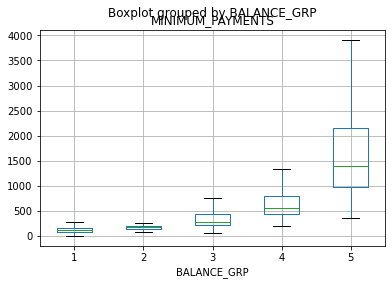

In [12]:
df.boxplot('MINIMUM_PAYMENTS', by='BALANCE_GRP', showfliers=False)
plt.show()

### Impute these missing values with mean and remove `CUST_ID` which is not useful.

In [13]:
df.drop(['CUST_ID'], axis=1, inplace=True)
# Fill NUll of MINIMUM_PAYMENTS using Median of BALANCE_GRP
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df.groupby('BALANCE_GRP')['MINIMUM_PAYMENTS'].transform('median'))

In [14]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna((df['CREDIT_LIMIT']).median())

In [15]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
BALANCE_GRP                         0
dtype: int64

In [16]:
df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BALANCE_GRP
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,558.932315,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,4
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,3
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,4
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,3
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,2


### Perform log transformation on the data

In [17]:
features = df.copy()
cols =  ['BALANCE',
         'PURCHASES',
         'ONEOFF_PURCHASES',
         'INSTALLMENTS_PURCHASES',
         'CASH_ADVANCE',
         'CASH_ADVANCE_TRX',
         'PURCHASES_TRX',
         'CREDIT_LIMIT',
         'PAYMENTS',
         'MINIMUM_PAYMENTS',
        ]

features[cols] = np.log(1 + features[cols])
features.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BALANCE_GRP
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12,1
1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.222222,12,5
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12,4
3,7.419183,0.636364,7.313220,7.313220,0.000000,5.331694,0.083333,0.083333,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,6.327816,0.000000,12,4
4,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12,3


###  Detect outliers in the continuous columns 



In [18]:
def detect_outliers(df):
    cols = list(df)
    for col in cols:
        if col in df.select_dtypes(include=np.number).columns:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            low_limit = q1 - (1.5*iqr)
            high_limit = q3 + (1.5*iqr)
            
            print(col + ' ---------', df.loc[(df[col] < low_limit) | (df[col] > high_limit)].shape[0])
            print(col + ' ---------', df.loc[(df[col] < low_limit) | (df[col] > high_limit)].shape[0] / len(df))
            print("--")
            
detect_outliers(df)

BALANCE --------- 695
BALANCE --------- 0.0776536312849162
--
BALANCE_FREQUENCY --------- 1493
BALANCE_FREQUENCY --------- 0.16681564245810057
--
PURCHASES --------- 808
PURCHASES --------- 0.09027932960893854
--
ONEOFF_PURCHASES --------- 1013
ONEOFF_PURCHASES --------- 0.11318435754189944
--
INSTALLMENTS_PURCHASES --------- 867
INSTALLMENTS_PURCHASES --------- 0.09687150837988827
--
CASH_ADVANCE --------- 1030
CASH_ADVANCE --------- 0.11508379888268157
--
PURCHASES_FREQUENCY --------- 0
PURCHASES_FREQUENCY --------- 0.0
--
ONEOFF_PURCHASES_FREQUENCY --------- 782
ONEOFF_PURCHASES_FREQUENCY --------- 0.08737430167597765
--
PURCHASES_INSTALLMENTS_FREQUENCY --------- 0
PURCHASES_INSTALLMENTS_FREQUENCY --------- 0.0
--
CASH_ADVANCE_FREQUENCY --------- 525
CASH_ADVANCE_FREQUENCY --------- 0.05865921787709497
--
CASH_ADVANCE_TRX --------- 804
CASH_ADVANCE_TRX --------- 0.08983240223463687
--
PURCHASES_TRX --------- 766
PURCHASES_TRX --------- 0.08558659217877095
--
CREDIT_LIMIT --------- 2

### Visualize the outliers using box plot

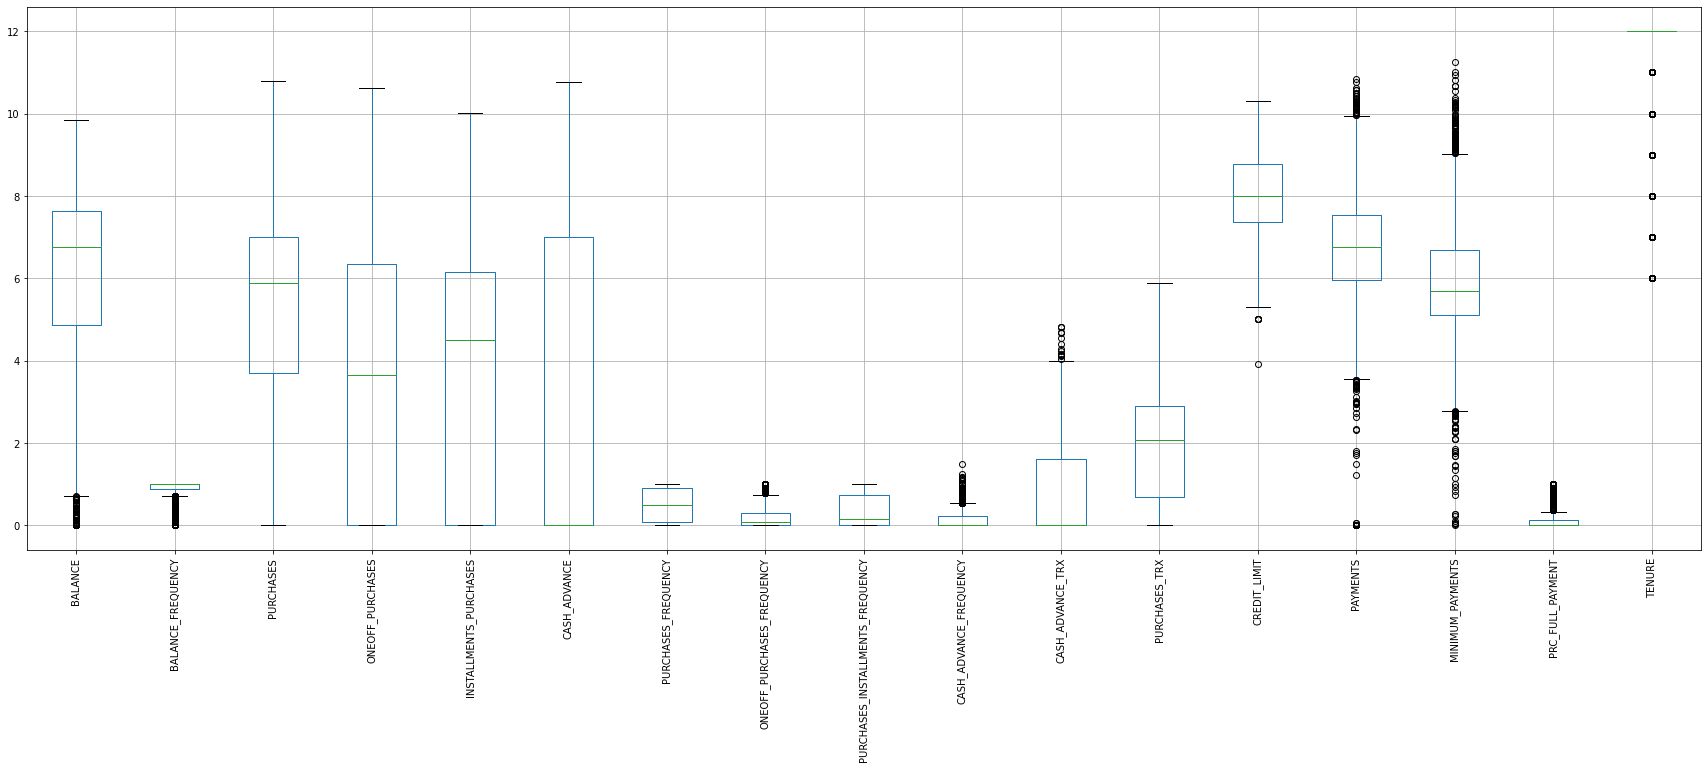

In [19]:
features.boxplot(rot=90, figsize=(30,10))
plt.show()

### Scale the features using scale function. This function will put all variables at the same scale, with mean zero and standard deviation equals to one.

In [20]:
cols = list(features)
for col in cols:
    features[col] = scale(np.array(features[col]))
    
features.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BALANCE_GRP
0,-1.205218,-0.249434,-0.113532,-0.987090,0.394480,-0.930733,-0.806490,-0.678661,-0.707313,-0.675349,-0.810069,-0.579510,-1.447163,-0.824484,-0.804209,-0.525551,0.36068,-1.414214
1,0.948918,0.134325,-1.679855,-0.987090,-1.087454,1.528788,-1.221758,-0.678661,-0.916995,0.573963,0.784603,-1.379210,0.926060,1.065033,0.912587,0.234227,0.36068,1.414214
2,0.824993,0.518084,0.600727,1.062022,-1.087454,-0.930733,1.269843,2.673451,-0.916995,-0.675349,-0.810069,0.487865,1.010229,-0.119300,0.460401,-0.525551,0.36068,0.707107
3,0.624653,-1.016953,0.827499,1.265778,-1.087454,0.564372,-1.014125,-0.399319,-0.916995,-0.258913,-0.123281,-0.874655,1.010229,-4.161996,0.363150,-0.525551,0.36068,0.707107
4,0.271260,0.518084,-0.708481,-0.114307,-1.087454,-0.930733,-1.014125,-0.399319,-0.916995,-0.675349,-0.810069,-0.874655,-1.224909,-0.064979,-0.332039,-0.525551,0.36068,0.000000


### Using the elbow method find the optimal number of clusters

In [21]:
from sklearn.cluster import KMeans
wcss = []
X = np.array(features)
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

### Plot the graph to visualize the Elbow Method to find the optimal number of cluster 

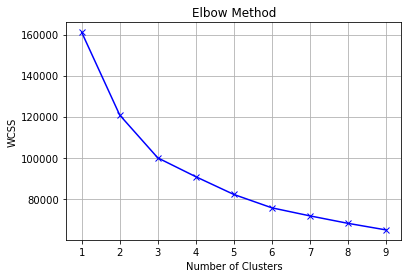

In [22]:
plt.grid()
plt.plot(range(1,10), wcss, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS")
plt.show()

### Applying KMeans to the dataset with the optimal number of cluster and store the clusters in the dataframe.

In [23]:
kmeans = KMeans(n_clusters = 6, random_state = 0)
cluster_labels = kmeans.fit_predict(X)

clusters = pd.concat([features, pd.DataFrame({'Cluster': cluster_labels})], axis = 1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BALANCE_GRP,Cluster
0,-1.205218,-0.249434,-0.113532,-0.987090,0.394480,-0.930733,-0.806490,-0.678661,-0.707313,-0.675349,-0.810069,-0.579510,-1.447163,-0.824484,-0.804209,-0.525551,0.36068,-1.414214,2
1,0.948918,0.134325,-1.679855,-0.987090,-1.087454,1.528788,-1.221758,-0.678661,-0.916995,0.573963,0.784603,-1.379210,0.926060,1.065033,0.912587,0.234227,0.36068,1.414214,0
2,0.824993,0.518084,0.600727,1.062022,-1.087454,-0.930733,1.269843,2.673451,-0.916995,-0.675349,-0.810069,0.487865,1.010229,-0.119300,0.460401,-0.525551,0.36068,0.707107,1
3,0.624653,-1.016953,0.827499,1.265778,-1.087454,0.564372,-1.014125,-0.399319,-0.916995,-0.258913,-0.123281,-0.874655,1.010229,-4.161996,0.363150,-0.525551,0.36068,0.707107,4
4,0.271260,0.518084,-0.708481,-0.114307,-1.087454,-0.930733,-1.014125,-0.399319,-0.916995,-0.675349,-0.810069,-0.874655,-1.224909,-0.064979,-0.332039,-0.525551,0.36068,0.000000,4


### Interpretation of Clusters

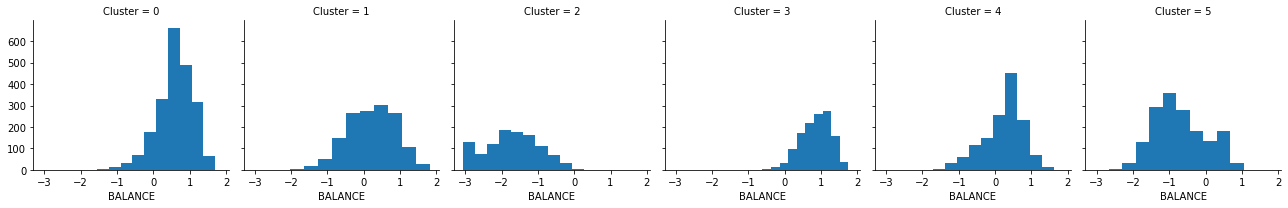

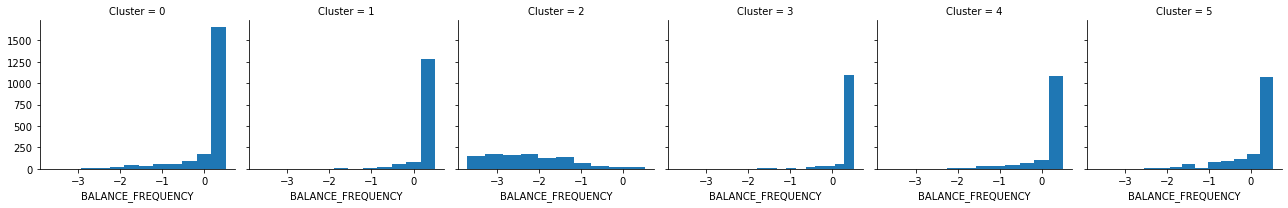

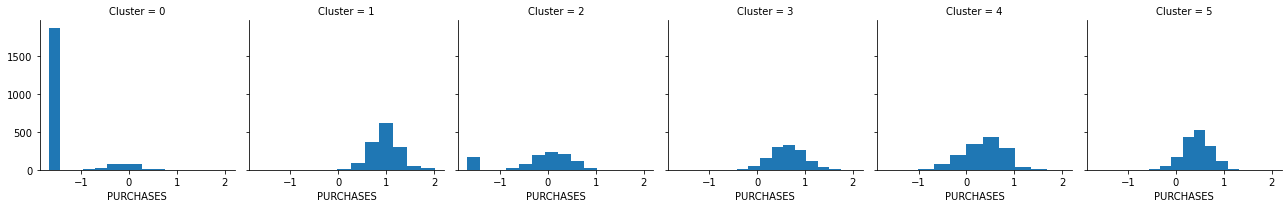

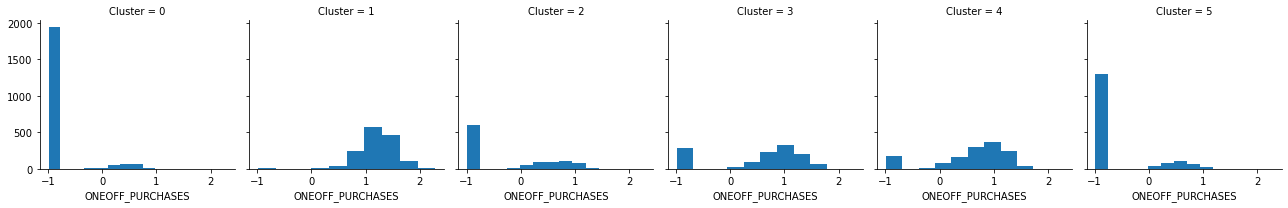

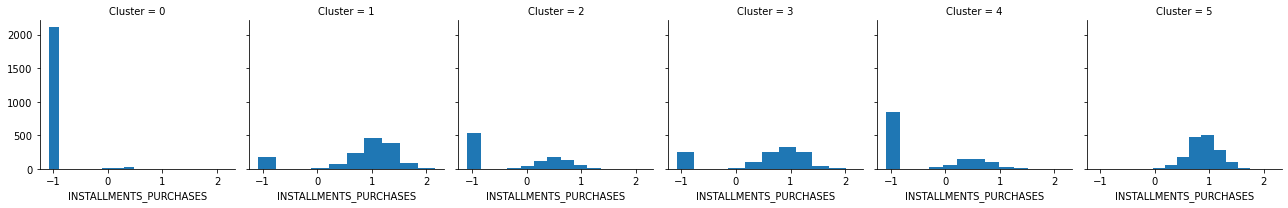

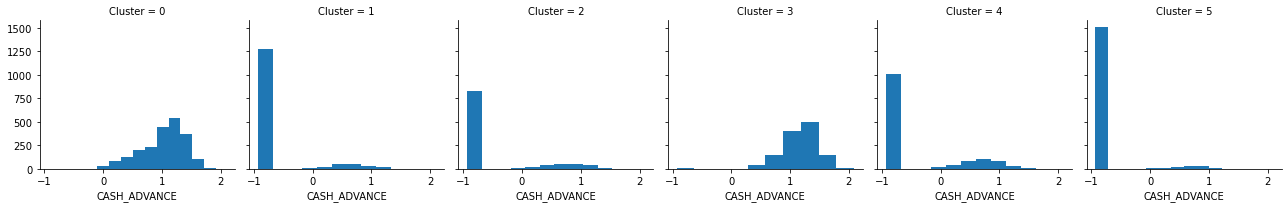

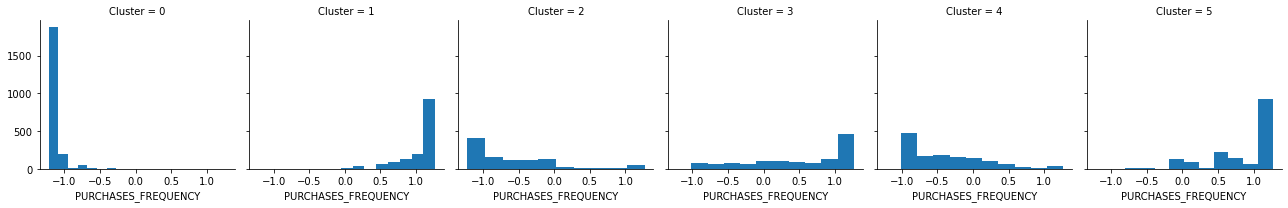

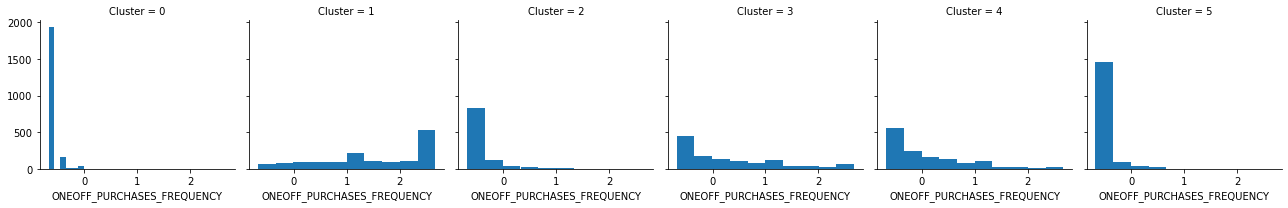

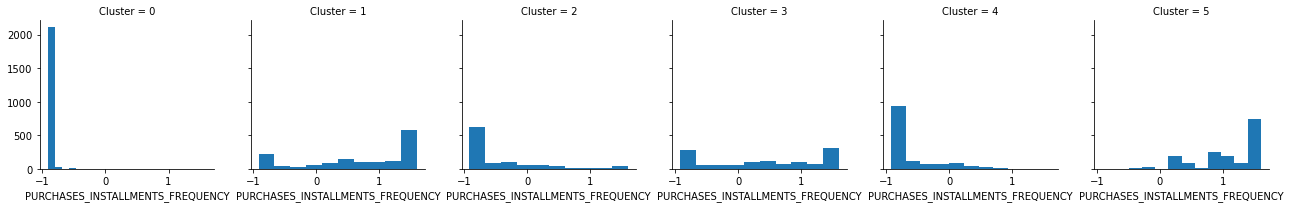

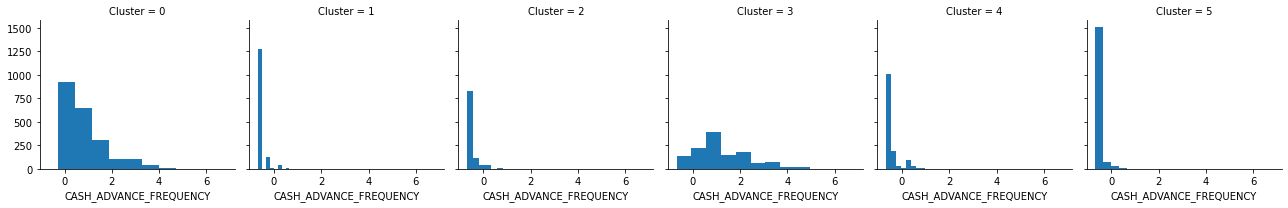

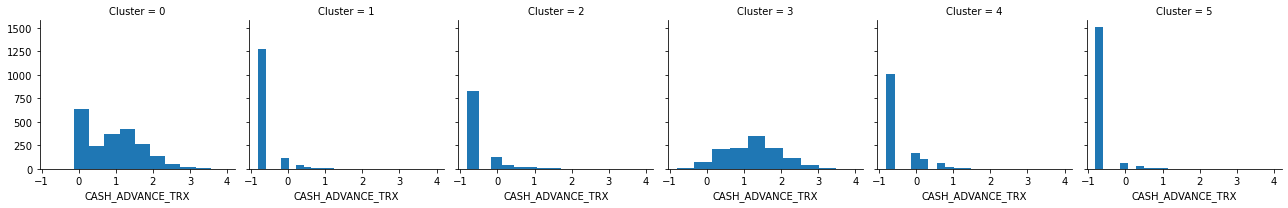

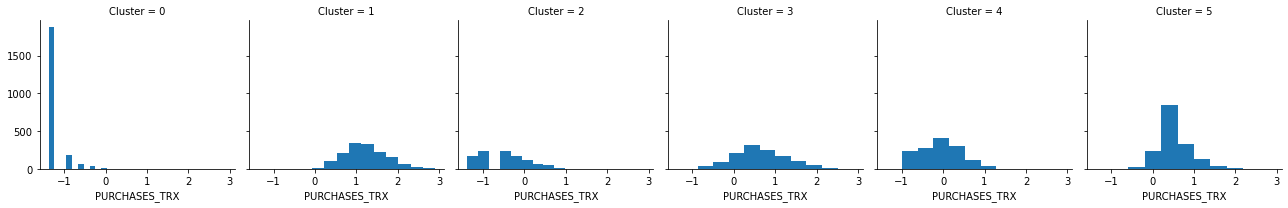

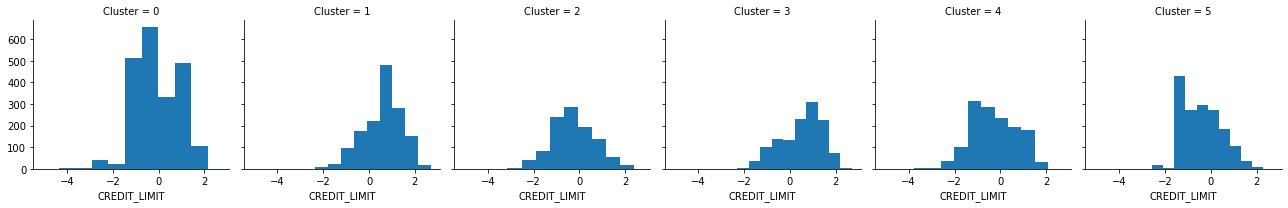

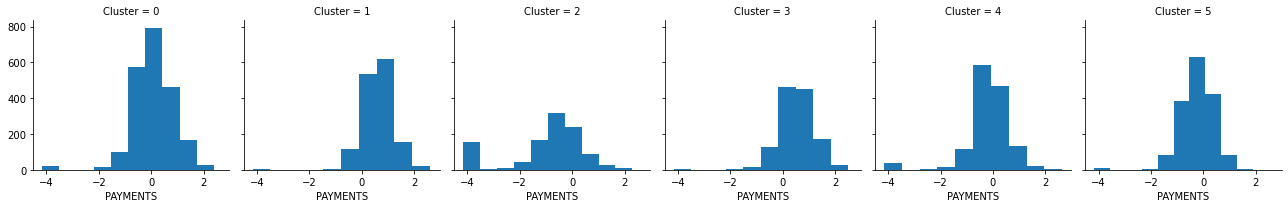

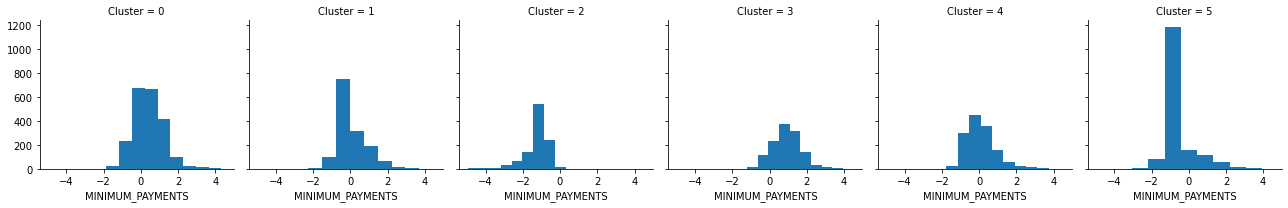

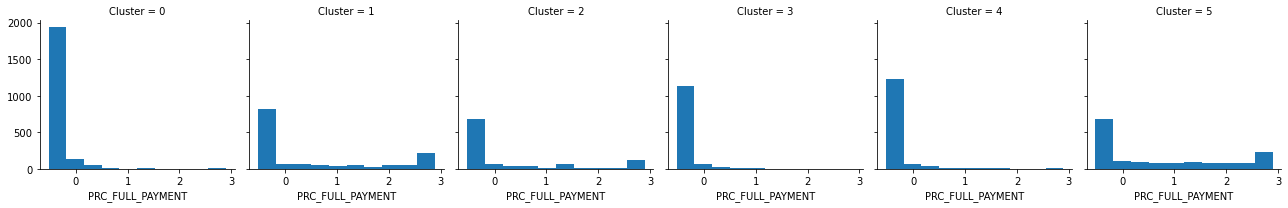

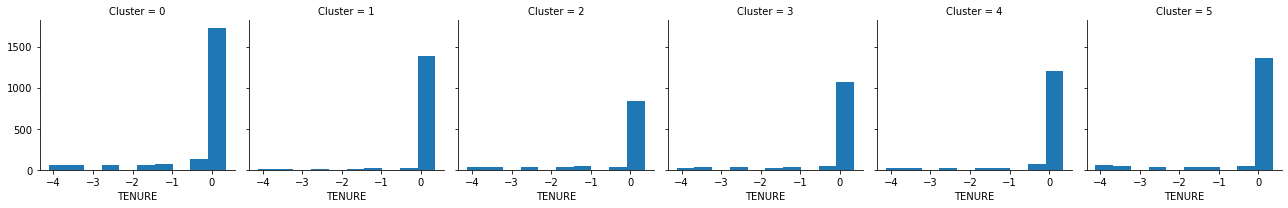

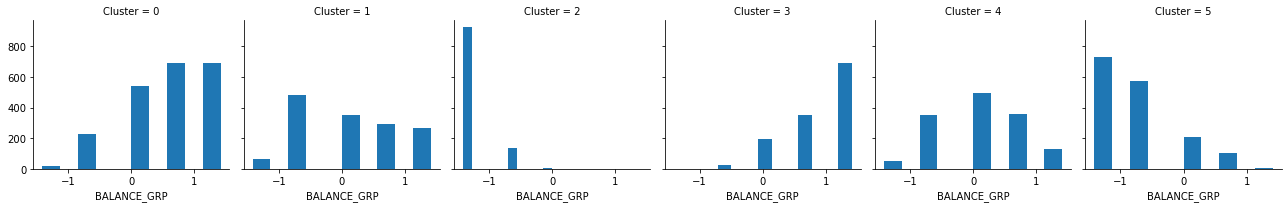

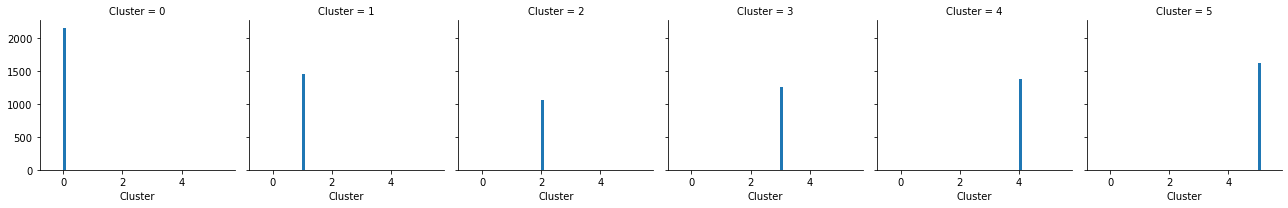

In [24]:
import seaborn as sns
for c in clusters:
    grid= sns.FacetGrid(clusters, col='Cluster')
    grid.map(plt.hist, c)

**Insights:**

**Cluster 0:** People with average to high credit limit who make all type of purchases

**Cluster 1:** People with high credit limit who take more cash in advance

**Cluster 2:** High spenders with high credit limit who make expensive purchases

**Cluster 3:** Less money spenders with average to high credit limits who purchases mostly in installments

**Cluster 4:** People who don't spend much money and who have average to high credit limit

**Cluster 5:** This group has more people with due payments who take advance cash more often

### Visualization of Clusters, use PCA to transform data to 2 dimensions for visualization

In [25]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

distance = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(distance)
X_PCA = pca.transform(distance)
X_PCA.shape

(8950, 2)

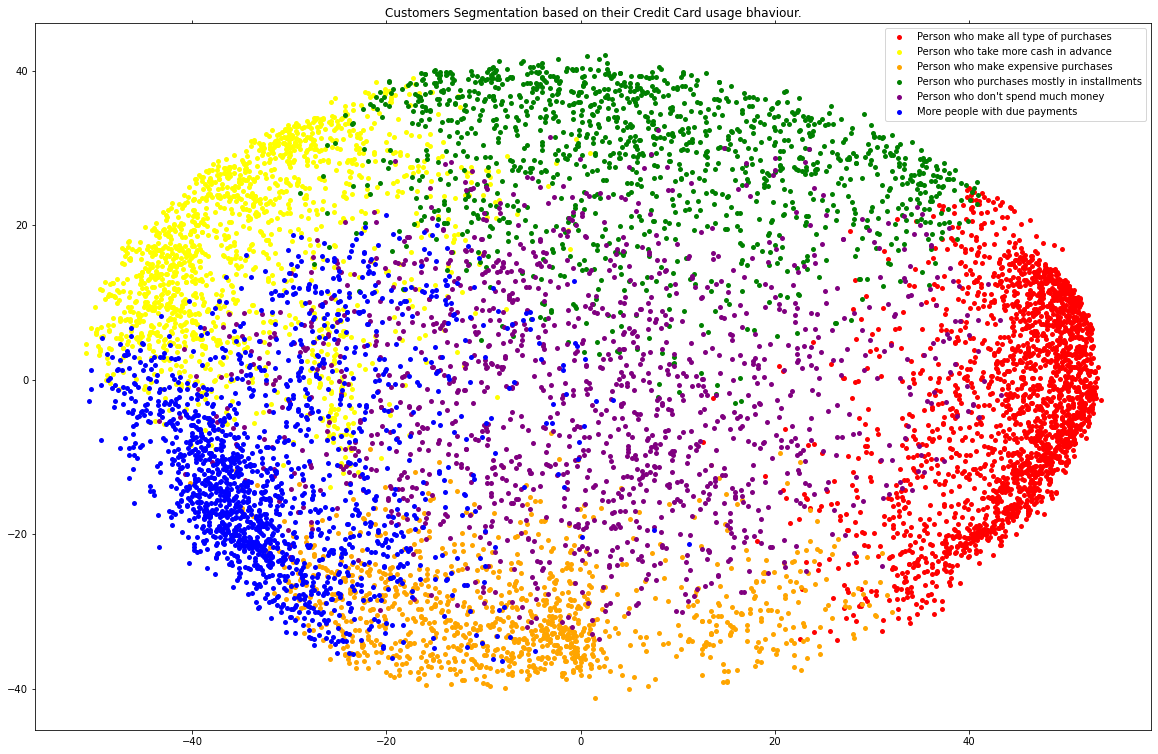

In [26]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'yellow',
          2: 'orange', 
          3: 'green', 
          4: 'purple',  
          5: 'blue'}

names = {0: 'Person who make all type of purchases' , 
         1: 'Person who take more cash in advance' ,
         2:  'Person who make expensive purchases' ,
         3: 'Person who purchases mostly in installments', 
         4: 'Person who don\'t spend much money',
         5: 'More people with due payments'}
  
df1 = pd.DataFrame({'x': x, 'y':y, 'label':cluster_labels}) 
groups = df1.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()